In [1]:
!conda info -e

# conda environments:
#
base                  *  C:\Users\vicae\anaconda3
PythonData               C:\Users\vicae\anaconda3\envs\PythonData
data-06-weatherpy        C:\Users\vicae\anaconda3\envs\data-06-weatherpy
rstudio                  C:\Users\vicae\anaconda3\envs\rstudio
weatherpy                C:\Users\vicae\anaconda3\envs\weatherpy



In [2]:
!conda list gmaps

# packages in environment at C:\Users\vicae\anaconda3:
#
# Name                    Version                   Build  Channel
gmaps                     0.9.0                      py_0    conda-forge


In [3]:
# Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URl for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1

# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 5o for logging purposes.
    if (i %  50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | dharmabad
Processing Record 5 of Set 1 | cayenne
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ivanteyevka
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | upington
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | pimentel
Processing Record 18 of Set 1 | port hedland
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 |

Processing Record 35 of Set 4 | santa maria
Processing Record 36 of Set 4 | poplevinskiy
Processing Record 37 of Set 4 | aljezur
Processing Record 38 of Set 4 | nichinan
Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | diego de almagro
Processing Record 46 of Set 4 | portland
Processing Record 47 of Set 4 | akyab
Processing Record 48 of Set 4 | udachnyy
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | novikovo
Processing Record 1 of Set 5 | bereda
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | bosconia
Processing Record 4 of Set 5 | balimo
City not found. Skipping...
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | lulea
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | lovington
Process

Processing Record 24 of Set 8 | vuktyl
Processing Record 25 of Set 8 | vila
Processing Record 26 of Set 8 | bhainsa
Processing Record 27 of Set 8 | westport
Processing Record 28 of Set 8 | briceni
Processing Record 29 of Set 8 | gangotri
City not found. Skipping...
Processing Record 30 of Set 8 | port hardy
Processing Record 31 of Set 8 | avera
Processing Record 32 of Set 8 | votkinsk
Processing Record 33 of Set 8 | sorland
Processing Record 34 of Set 8 | gwadar
Processing Record 35 of Set 8 | babaeski
Processing Record 36 of Set 8 | mount darwin
Processing Record 37 of Set 8 | bac lieu
Processing Record 38 of Set 8 | thinadhoo
Processing Record 39 of Set 8 | zelenokumsk
Processing Record 40 of Set 8 | esperance
Processing Record 41 of Set 8 | mampong
Processing Record 42 of Set 8 | kruisfontein
Processing Record 43 of Set 8 | samusu
City not found. Skipping...
Processing Record 44 of Set 8 | beringovskiy
Processing Record 45 of Set 8 | troy
Processing Record 46 of Set 8 | souillac
Pro

Processing Record 12 of Set 12 | santiago del estero
Processing Record 13 of Set 12 | vredendal
Processing Record 14 of Set 12 | schiffdorf
Processing Record 15 of Set 12 | lagunas
Processing Record 16 of Set 12 | barabai
Processing Record 17 of Set 12 | labutta
City not found. Skipping...
Processing Record 18 of Set 12 | kuche
City not found. Skipping...
Processing Record 19 of Set 12 | caluquembe
Processing Record 20 of Set 12 | burica
City not found. Skipping...
Processing Record 21 of Set 12 | margate
Processing Record 22 of Set 12 | saint anthony
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | villa maria
Processing Record 25 of Set 12 | naftah
City not found. Skipping...
Processing Record 26 of Set 12 | himora
City not found. Skipping...
Processing Record 27 of Set 12 | zhuanghe
Processing Record 28 of Set 12 | mala
Processing Record 29 of Set 12 | lewiston
Processing Record 30 of Set 12 | manicore
Processing Record 31 of Set 12 | bourail
Processing Re

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,44.76,77,7,5.91,GL,2022-06-23 14:11:43
1,Rikitea,-23.1203,-134.9692,75.11,66,46,15.97,PF,2022-06-23 14:11:44
2,Chokurdakh,70.6333,147.9167,35.04,62,10,16.11,RU,2022-06-23 14:11:44
3,Dharmabad,18.9000,77.8500,84.18,67,94,7.23,IN,2022-06-23 14:11:44
4,Cayenne,4.9333,-52.3333,86.09,25,75,3.44,GF,2022-06-23 14:11:44
5,Codrington,-38.2667,141.9667,54.55,90,100,17.67,AU,2022-06-23 14:11:45
6,Ushuaia,-54.8000,-68.3000,37.06,93,100,21.85,AR,2022-06-23 14:11:45
7,Avarua,-21.2078,-159.7750,75.25,60,93,9.22,CK,2022-06-23 14:11:45
8,Nikolskoye,59.7035,30.7861,75.87,39,100,5.88,RU,2022-06-23 14:11:46
9,Busselton,-33.6500,115.3333,54.45,81,40,8.08,AU,2022-06-23 14:11:46


In [13]:
# Reordering the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-06-23 14:11:43,65.6145,-37.6368,44.76,77,7,5.91
1,Rikitea,PF,2022-06-23 14:11:44,-23.1203,-134.9692,75.11,66,46,15.97
2,Chokurdakh,RU,2022-06-23 14:11:44,70.6333,147.9167,35.04,62,10,16.11
3,Dharmabad,IN,2022-06-23 14:11:44,18.9000,77.8500,84.18,67,94,7.23
4,Cayenne,GF,2022-06-23 14:11:44,4.9333,-52.3333,86.09,25,75,3.44
5,Codrington,AU,2022-06-23 14:11:45,-38.2667,141.9667,54.55,90,100,17.67
6,Ushuaia,AR,2022-06-23 14:11:45,-54.8000,-68.3000,37.06,93,100,21.85
7,Avarua,CK,2022-06-23 14:11:45,-21.2078,-159.7750,75.25,60,93,9.22
8,Nikolskoye,RU,2022-06-23 14:11:46,59.7035,30.7861,75.87,39,100,5.88
9,Busselton,AU,2022-06-23 14:11:46,-33.6500,115.3333,54.45,81,40,8.08


In [14]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1655994410.9779346

In [17]:
today = time.strftime("%x")
today

'06/23/22'

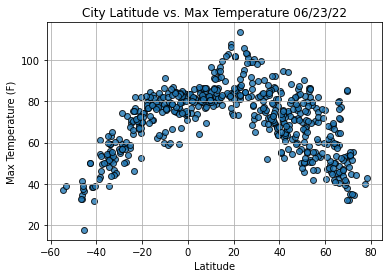

In [18]:
# Import time module
import time

# Add Dependencies
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

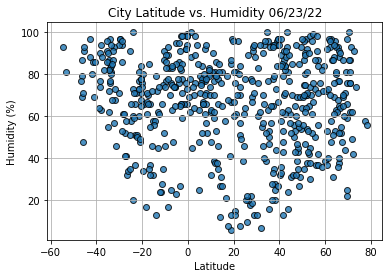

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

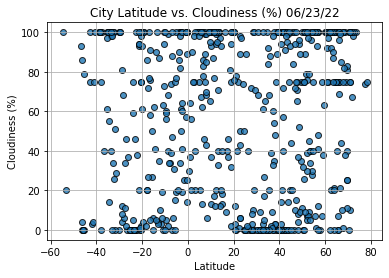

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

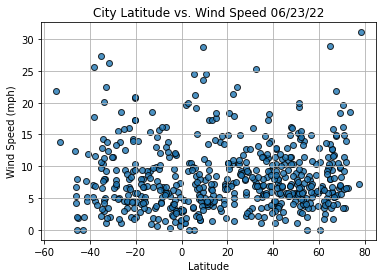

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=11, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2022-06-23 14:11:40
Lat                       42.6001
Lng                      -73.9662
Max Temp                    64.22
Humidity                       84
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
560    False
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-06-23 14:11:43,65.6145,-37.6368,44.76,77,7,5.91
2,Chokurdakh,RU,2022-06-23 14:11:44,70.6333,147.9167,35.04,62,10,16.11
3,Dharmabad,IN,2022-06-23 14:11:44,18.9000,77.8500,84.18,67,94,7.23
4,Cayenne,GF,2022-06-23 14:11:44,4.9333,-52.3333,86.09,25,75,3.44
8,Nikolskoye,RU,2022-06-23 14:11:46,59.7035,30.7861,75.87,39,100,5.88


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

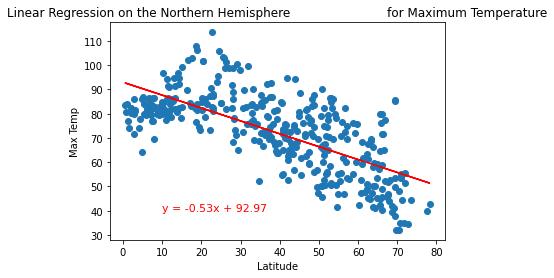

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

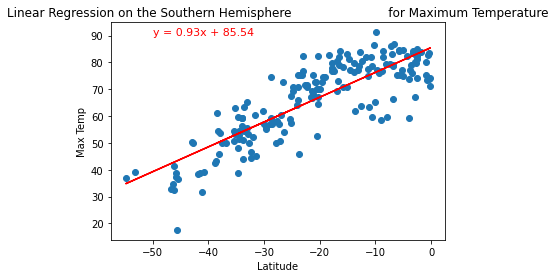

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

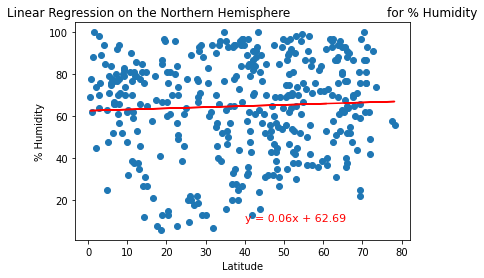

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

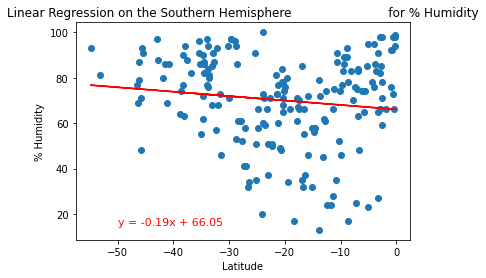

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

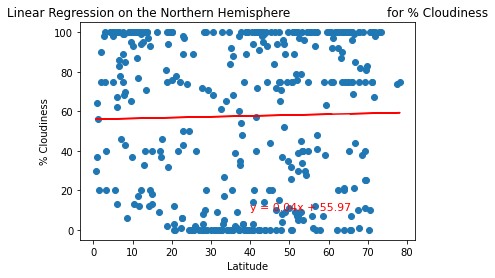

In [31]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

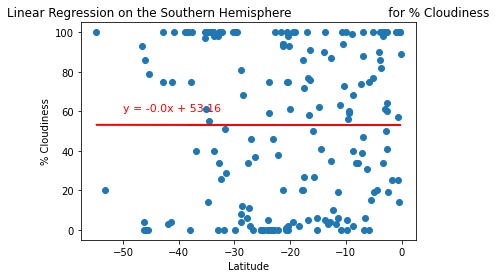

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

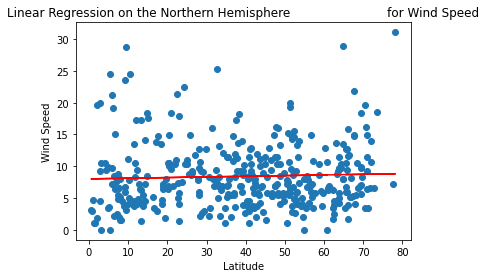

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

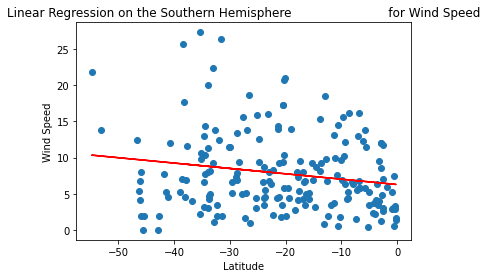

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [35]:
# Import the dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import gmaps
import os
import requests
import gmaps.datasets
# Import the API key.
from config1 import g_key

ModuleNotFoundError: No module named 'config1'

In [ ]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("cities.csv")
city_data_df.head()

In [ ]:
# Get the data types.
city_data_df.dtypes

In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!conda install -c conda-forge gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

In [ ]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [ ]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

In [ ]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)


In [ ]:
# Add the heatmap layer
fig.add_layer(heat_layer)
fig

In [ ]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
# Heatmap of percent Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
preferred_cities_df.count()

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

In [ ]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [ ]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config1 import g_key

In [ ]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

In [ ]:
len(hotels["results"])

In [ ]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError, NewErrors):
    print("Hotel not found... skipping.")

In [ ]:
hotel_df.head(10)

In [ ]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [ ]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

In [ ]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [ ]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig